In [54]:
import os
#read the dataset
path = "./data/archive/"

In [55]:
from collections import Counter

names = [name.replace( ' ','_').split('_')[0] for name in os.listdir(path)]
classes = Counter(names) #returns directory

In [56]:
Counter({'arecaceae': 35,

'anadenanthera': 20,

'arrabidaea': 35,

'cecropia': 35,

'chromolaena': 35,

'combretum': 35,

'croton': 35,

'dipteryx': 35,

'eucalipto': 35,

'faramea': 35,

'hyptis': 35,

'mabea': 35,

'matayba': 35,

'mimosa': 35,

'myrcia': 35,

'protium': 35,

'qualea': 35,

'schinus': 35,

'senegalia': 35,

'serjania': 35,

'syagrus': 35,

'tridax': 35,

'urochloa': 35})


Counter({'arecaceae': 35,
         'arrabidaea': 35,
         'cecropia': 35,
         'chromolaena': 35,
         'combretum': 35,
         'croton': 35,
         'dipteryx': 35,
         'eucalipto': 35,
         'faramea': 35,
         'hyptis': 35,
         'mabea': 35,
         'matayba': 35,
         'mimosa': 35,
         'myrcia': 35,
         'protium': 35,
         'qualea': 35,
         'schinus': 35,
         'senegalia': 35,
         'serjania': 35,
         'syagrus': 35,
         'tridax': 35,
         'urochloa': 35,
         'anadenanthera': 20})

In [57]:
#tOTAL NO OF iMAGES
print("no of images: ",len(names))

no of images:  790


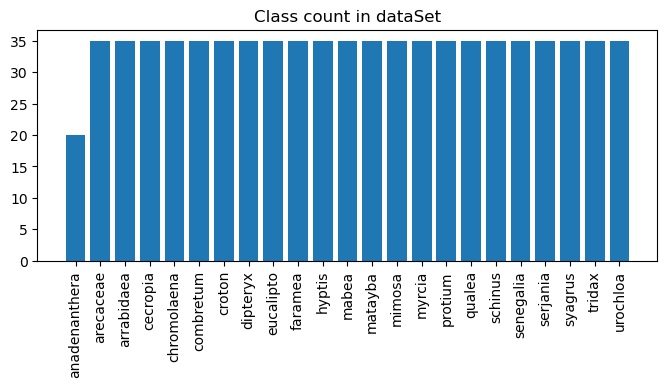

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,3))
plt.title("Class count in dataSet")
plt.bar(*zip(*classes.items()))
plt.xticks(rotation = 'vertical')
plt.show();

In [59]:
path_class = {key:[] for key in classes.keys()}

for name in os.listdir(path):
    key = name.replace(' ','_').split('_')[0]
    path_class[key].append(path + name)

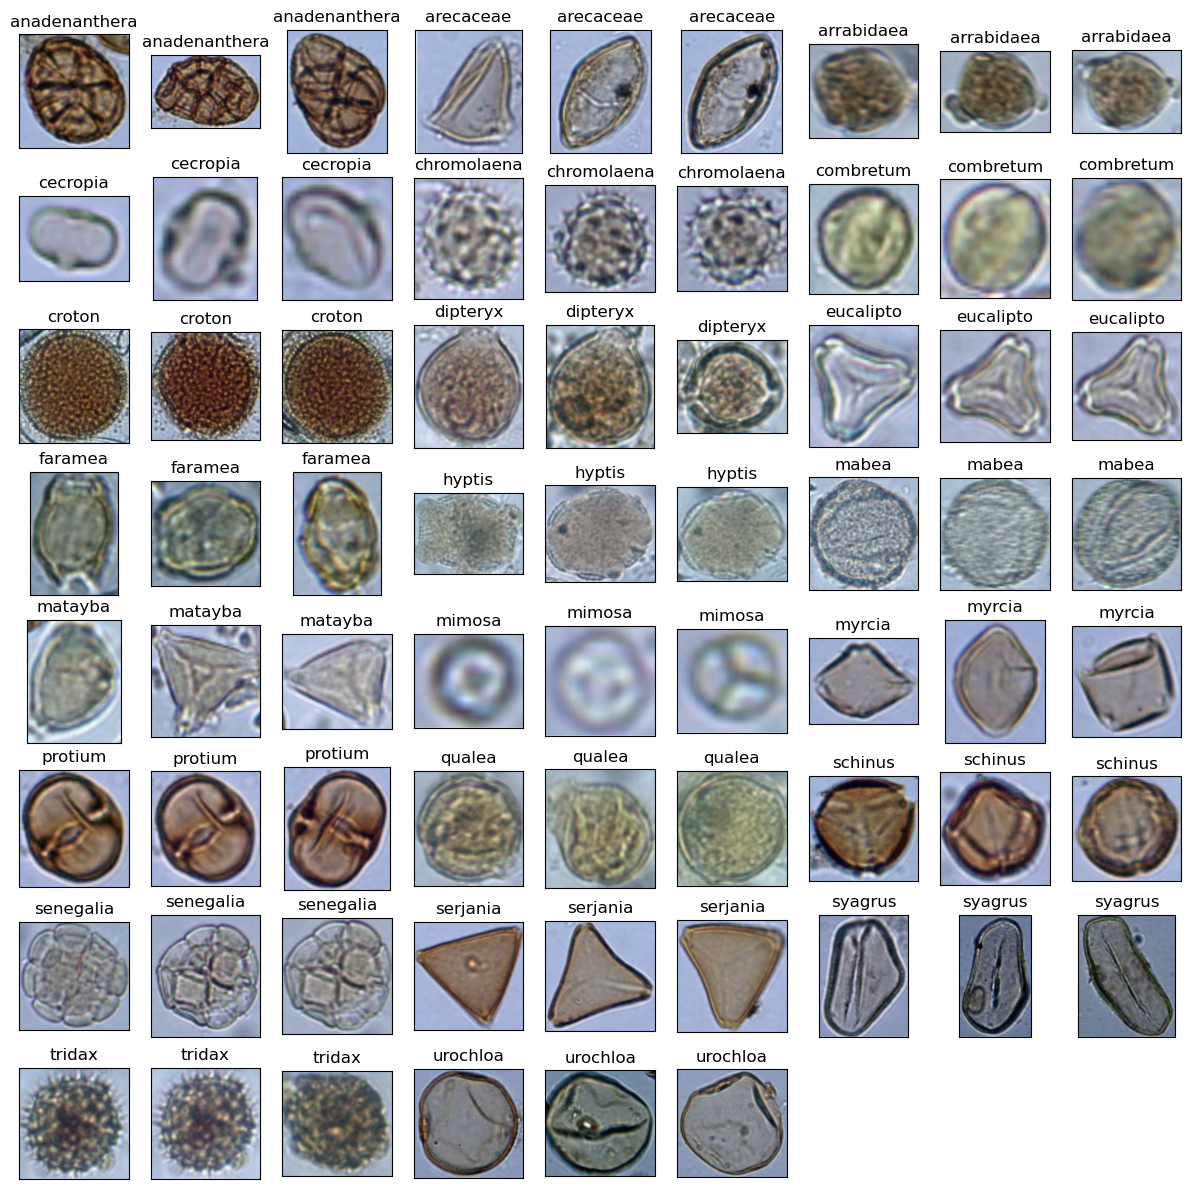

In [60]:
from PIL import Image

fig = plt.figure(figsize=(15, 15))

for i, key in enumerate(path_class.keys()):

    img1 = Image.open(path_class [key][0])

    img2 = Image.open(path_class [key][1])

    img3 = Image.open(path_class [key][2])

    ax = fig.add_subplot(8, 9, 3*i + 1, xticks=[], yticks=[]) 
    ax.imshow(img1)
    ax.set_title(key)

    ax = fig.add_subplot(8, 9, 3*i + 2, xticks=[], yticks=[])
    ax.imshow(img2)
    ax.set_title(key)

    ax = fig.add_subplot(8, 9, 3*i + 3, xticks=[], yticks=[])
    ax.imshow(img3)
    ax.set_title(key)

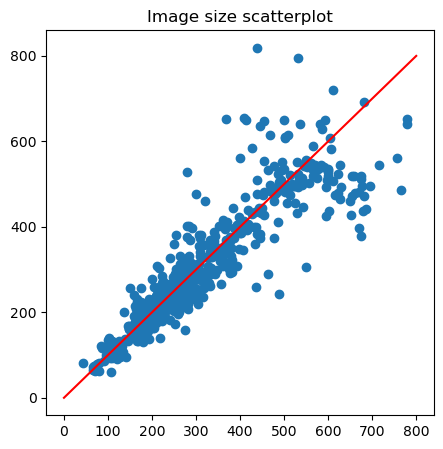

In [61]:
!pip install opencv-python

import cv2
size = [cv2.imread(path + name).shape for name in os.listdir (path)]

x, y, _ = zip(*size)

fig =  plt.figure(figsize=(5,5))

#scatter plot

plt.scatter(x,y)

plt.title("Image size scatterplot")

# add diagonal red Line

plt.plot([0,800], [0,800], 'r')

In [62]:
def process_img(img, size = (128,128)):
    img = cv2.resize(img, size)
    img = img/255
    return img

In [63]:
import numpy as np
X,Y = [] , []
for name in os.listdir(path):
    img = cv2.imread(path + name)
    X.append(process_img(img))
    Y.append(name.replace(' ', '_').split('_')[0])

X = np.array(X)

In [64]:
!pip install tensorflow
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder



le = LabelEncoder()
Y_le = le.fit_transform(Y)
Y_cat = to_categorical(Y_le,23)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test,  = train_test_split(X,Y_cat, test_size=0.285, stratify = Y_le)
print("Images in each class in Test set: {}".format(np.sum(Y_test, axis = 0)))

Images in each class in Test set: [ 6. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10.]


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


input_shape = X_train[0].shape
output_shape = 23  # No. of classes

model = Sequential()

# Block 1
model.add(Conv2D(filters=16, kernel_size=3, input_shape=input_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

# Block 2
model.add(Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

# Block 3
model.add(Conv2D(filters=64, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

# Block 4
model.add(Conv2D(filters=128, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

# Dense layers
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(output_shape, activation='softmax'))

model.summary()


c:\Users\showr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │     4,096,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 150)            │        75,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 23)             │         3,473 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,218,803 (16.09 MB)

 Trainable params: 4,218,803 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
print('model is compiled')

model is compiled


In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagener = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range= 0.2,
    height_shift_range =0.2,
    horizontal_flip = True,
    vertical_flip = True,)

datagener.fit(X_train)

In [69]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

batch_size = 4
epochs = 500

model_path = 'cnn.keras'
callbecks = [EarlyStopping(monitor = 'val_loss', patience = 20),
             ModelCheckpoint(filepath = model_path, save_best_only = True)]

history = model.fit(
    datagener.flow(X_train, Y_train, batch_size=batch_size),
    batch_size = batch_size,
    steps_per_epoch = len(X_train) // batch_size,
    epochs = epochs,
    validation_data = (X_train, Y_train),
    callbacks = callbecks,
    verbose = 1)

Epoch 1/500


c:\Users\showr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.0501 - loss: 3.1546 - val_accuracy: 0.0887 - val_loss: 3.0099
Epoch 2/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.0663 - loss: 2.9356 - val_accuracy: 0.1348 - val_loss: 2.7161
Epoch 3/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.1060 - loss: 2.7300 - val_accuracy: 0.1613 - val_loss: 2.5279
Epoch 4/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.1038 - loss: 2.6551 - val_accuracy: 0.1294 - val_loss: 2.4681
Epoch 5/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.1152 - loss: 2.5819 - val_accuracy: 0.1702 - val_loss: 2.3096
Epoch 6/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.1788 - loss: 2.4271 - val_accuracy: 0.1560 - val_loss: 2.6119
Epoch 7/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.1388 - loss: 2.3886 - val_accuracy: 0.2305 - val_loss: 2.1834
Epoch 8/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2373 - loss: 2.2453 - val_accuracy

In [70]:
from tensorflow.keras.models import load_model

# ✅ Step 1: Load the full model (architecture + weights)
model = load_model('cnn.keras')

# ✅ Step 2: Evaluate the model
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test set accuracy:", score[1])




Test set accuracy: 0.8053097128868103


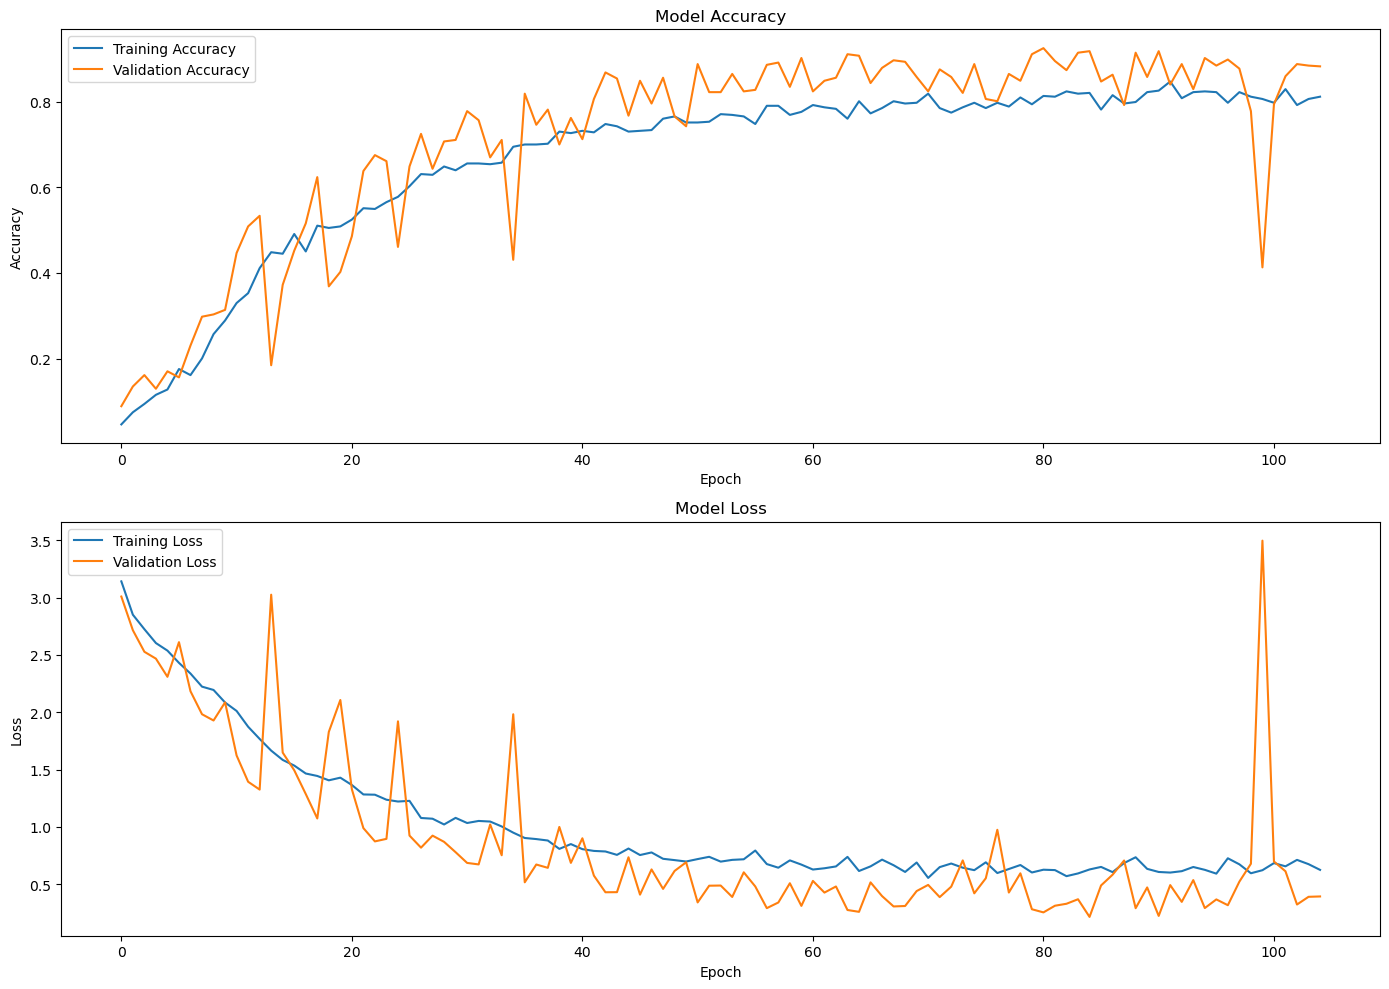

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# -------- Accuracy --------
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history.get('val_accuracy', []), label='Validation Accuracy')  # Optional
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# -------- Loss --------
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history.get('val_loss', []), label='Validation Loss')  # Optional
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [77]:
# save the model
model.save("model.h5")
model.save('model.keras')  # ✅ saves full model in new format


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


c:\Users\showr\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


arecaceae


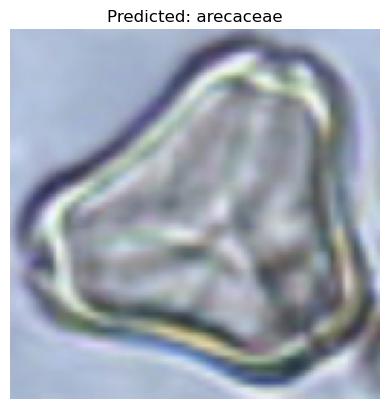

In [81]:
# ✅ Required Imports
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# ✅ Load Trained Model
model = load_model('model.keras')  # Make sure this file exists

# ✅ Load Image and Resize
img = load_img('./data/archive/eucalipto_23.jpg', target_size=(128, 128))
img = img.resize((128, 128))  # Optional, already resized above

# ✅ Convert to array and preprocess
x = img_to_array(img)
x = np.expand_dims(x, axis=0)  # Shape becomes (1, 128, 128, 3)

# ✅ Predict
a = np.argmax(model.predict(x), axis=1)

# Optional index list if needed
# index = [str(i) for i in range(30)]
# result = str(index[a[0]])

# ✅ Class labels (Make sure length matches your model's output)
op = ['arecaceae', 'anadenanthera', 'arrabidaea', 'cecropia', 'chromolaena',
      'combretum', 'croton', 'dipteryx', 'eucalyptus', 'eucalipto',
      'hibiscus', 'inga', 'jacaranda', 'ligustrum', 'luehea',
      'myrcia', 'palm', 'piptadenia', 'psidium', 'quercus',
      'sambucus', 'senna', 'solanum', 'tabebuia', 'terminalia',
      'trema', 'triplaris', 'trophis', 'vismia', 'zanthoxylum']  # Example 30 classes

# ✅ Get prediction
result = op[a[0]]

# ✅ Print result
print(result)

import matplotlib.pyplot as plt

# Show image with predicted label
plt.imshow(img)
plt.title(f"Predicted: {result}")
plt.axis('off')
plt.show()



In [74]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Load image
img = load_img('./data/archive/anadenanthera_16.jpg', target_size=(128, 128))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Predict
y_pred = model.predict(x)
class_idx = np.argmax(y_pred, axis=1)[0]
# class_names = ['arecaceae', 'anadenanthera', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum']  # add all
class_names = ['arecaceae', 'anadenanthera', 'arrabidaea', 'cecropia', 'chromolaena',
      'combretum', 'croton', 'dipteryx', 'eucalyptus', 'eucalipto',
      'hibiscus', 'inga', 'jacaranda', 'ligustrum', 'luehea',
      'myrcia', 'palm', 'piptadenia', 'psidium', 'quercus',
      'sambucus', 'senna', 'solanum', 'tabebuia', 'terminalia',
      'trema', 'triplaris', 'trophis', 'vismia', 'zanthoxylum']  # 6 iemst

# Suppose class_idx = 8 → ❌ IndexError

class_name = class_names[class_idx]
confidence = round(100 * y_pred[0][class_idx], 2)

print("Predicted index:", class_idx)
print("Predicted name:", class_names[class_idx])

# print("Predicted class index:", class_idx)
# print("Predicted class name:", class_name)
print(f"Confidence: {confidence}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted index: 1
Predicted name: anadenanthera
Confidence: 100.0%


In [75]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.keras.models import load_model

# # ✅ Load Trained Model
# model = load_model('model.h5')  # Make sure this file exists

# # ✅ Load Image and Resize
# img = load_img('./data/archive/anadenanthera_23.jpg', target_size=(128, 128))
# # img = img.resize((128, 128))  # Optional, already resized above

# # ✅ Convert to array and preprocess
# x = img_to_array(img)
# x = np.expand_dims(x, axis=0)  # Shape becomes (1, 128, 128, 3)

# # ✅ Predict
# a = np.argmax(model.predict(x), axis=1)

# # Optional index list if needed
# index = [str(i) for i in range(30)]
# # result = str(index[a[0]])

# # ✅ Class labels (Make sure length matches your model's output)
# op = ['arecaceae', 'anadenanthera', 'arrabidaea', 'cecropia', 'chromolaena',
#       'combretum', 'croton', 'dipteryx', 'eucalyptus', 'eucalipto',
#       'hibiscus', 'inga', 'jacaranda', 'ligustrum', 'luehea',
#       'myrcia', 'palm', 'piptadenia', 'psidium', 'quercus',
#       'sambucus', 'senna', 'solanum', 'tabebuia', 'terminalia',
#       'trema', 'triplaris', 'trophis', 'vismia', 'zanthoxylum']  # Example 30 classes

# # ✅ Get prediction
# result = op[a[0]]

# # ✅ Print result
# print(result)

# import matplotlib.pyplot as plt

# # Show image with predicted label
# plt.imshow(img)
# plt.title(f"Predicted: {result}")
# plt.axis('off')
# plt.show()



from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Load image
img = load_img('./data/archive/cecropia_05.jpg', target_size=(128, 128))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Predict
y_pred = model.predict(x)
class_idx = np.argmax(y_pred, axis=1)[0]
# class_names = ['arecaceae', 'anadenanthera', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum']  # add all
class_names = ['arecaceae', 'anadenanthera', 'arrabidaea', 'cecropia', 'chromolaena',
      'combretum', 'croton', 'dipteryx', 'eucalyptus', 'eucalipto',
      'hibiscus', 'inga', 'jacaranda', 'ligustrum', 'luehea',
      'myrcia', 'palm', 'piptadenia', 'psidium', 'quercus',
      'sambucus', 'senna', 'solanum', 'tabebuia', 'terminalia',
      'trema', 'triplaris', 'trophis', 'vismia', 'zanthoxylum']  # 6 iemst

# Suppose class_idx = 8 → ❌ IndexError

class_name = class_names[class_idx]
confidence = round(100 * y_pred[0][class_idx], 2)

print("Predicted index:", class_idx)
print("Predicted name:", class_names[class_idx])

# print("Predicted class index:", class_idx)
# print("Predicted class name:", class_name)
print(f"Confidence: {confidence}%")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted index: 0
Predicted name: arecaceae
Confidence: 100.0%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
arecaceae


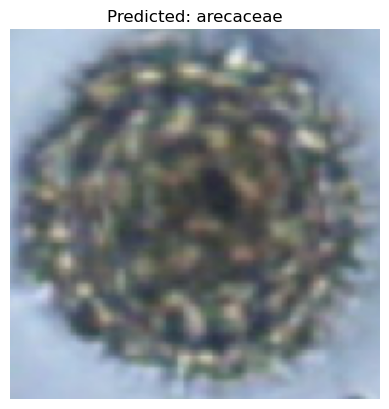

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# ✅ Load Trained Model
model = load_model('model.h5')  # Make sure this file exists

# ✅ Load Image and Resize
img = load_img('./data/archive/arecaceae_12.jpg', target_size=(128, 128))
img = img.resize((128, 128))  # Optional, already resized above

# ✅ Convert to array and preprocess
x = img_to_array(img)
x = np.expand_dims(x, axis=0)  # Shape becomes (1, 128, 128, 3)

# ✅ Predict
a = np.argmax(model.predict(x), axis=1)

# Optional index list if needed
index = [str(i) for i in range(30)]
result = str(index[a[0]])

# ✅ Class labels (Make sure length matches your model's output)
op = ['arecaceae', 'anadenanthera', 'arrabidaea', 'cecropia', 'chromolaena',
      'combretum', 'croton', 'dipteryx', 'eucalyptus', 'eucalipto',
      'hibiscus', 'inga', 'jacaranda', 'ligustrum', 'luehea',
      'myrcia', 'palm', 'piptadenia', 'psidium', 'quercus',
      'sambucus', 'senna', 'solanum', 'tabebuia', 'terminalia',
      'trema', 'triplaris', 'trophis', 'vismia', 'zanthoxylum']  # Example 30 classes

# ✅ Get prediction
result = op[a[0]]

# ✅ Print result
print(result)

import matplotlib.pyplot as plt

# Show image with predicted label
plt.imshow(img)
plt.title(f"Predicted: {result}")
plt.axis('off')
plt.show()

